In [1]:
import mysql.connector
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# CREATE

In [2]:
def insert_patient(cnx):
    cursor = cnx.cursor()
    
    try:
        initial_query = 'SELECT * FROM Patient;'
        cursor.execute(initial_query)
        initial_rows = cursor.fetchall()
        data = [dict(zip(cursor.column_names, row)) for row in initial_rows]
        print('Initial Patient table:')
        df = pd.DataFrame(data)
        print(df)
        
        firstname = input("Enter patient's first name: ")
        lastname = input("Enter patient's last name: ")
        dob = input("Enter patient's date of birth (YYYY-MM-DD): ")
        gender = input("Enter patient's gender: ")
        address = input("Enter patient's address: ")
        phone = input("Enter patient's phone number: ")
        email = input("Enter patient's email: ")
        doctorfn = input("Enter doctor's first name: ")
        doctorln = input("Enter doctor's last name: ")

        cursor.callproc('create_patient2', [firstname, lastname, dob, gender, address, phone, email, doctorfn, doctorln])
        cnx.commit()  

        print("Patient added successfully.")
        
        updated_query = 'SELECT * FROM Patient;'
        cursor.execute(updated_query)
        updated_rows = cursor.fetchall()
        updated_data = [dict(zip(cursor.column_names, row)) for row in updated_rows]
        print('Updated Patient table:')
        df = pd.DataFrame(updated_data)
        print(df)
        
    except mysql.connector.Error as e:
        print("Error:", e)
        if 'specified doctor does not exist' in str(e):
            raise ValueError("The specified doctor does not exist in the database. Please add this doctor before proceeding.")
    
    finally:
        cursor.close()


In [3]:
def insert_doc(cnx):
    cursor = cnx.cursor()
    
    try:
        firstname = input("Enter doctor's first name: ")
        lastname = input("Enter doctor's last name: ")
        department = input("Enter the department name: ")

        cursor.callproc('create_doc', [firstname, lastname, department])
        cnx.commit()  

        print("Doctor added successfully.")
        
    except mysql.connector.Error as e:
        print("Error:", e)
        if 'specified department does not exist' in str(e):
            department_table = 'SELECT * FROM Department;'
            cursor.execute(department_table)
            updated_rows = cursor.fetchall()
            updated_data = [dict(zip(cursor.column_names, row)) for row in updated_rows]
            print('Current department table:')
            df = pd.DataFrame(updated_data)
            print(df)
            raise ValueError("The specified department does not exist in the database. Please use one of the following departments.")
    
    finally:
        cursor.close()


In [4]:
def insert_app(cnx):
    cursor = cnx.cursor()
    
    try:
        patient_id = int(input("Enter the patient's ID: "))
        doctor_id = int(input("Enter the doctor's ID: "))
        appointment_date = input("Enter the appointment date (YYYY-MM-DD): ")
        appointment_time = input("Enter the appointment time (HH:MM): ")
        purpose = input("Enter the purpose of the appointment: ")

        cursor.callproc('create_appointment', [patient_id, doctor_id, appointment_date, appointment_time, purpose])
        cnx.commit()  

        print("Appointment added successfully.")
        
    except mysql.connector.Error as e:
        print("Error:", e)
        if 'specified patient does not exist' in str(e):
            raise ValueError("The specified patient does not exist in the database. Please check the patient ID and try again.")
        elif 'specified doctor does not exist' in str(e):
            raise ValueError("The specified doctor does not exist in the database. Please check the doctor ID and try again.")
    
    finally:
        cursor.close()


# READ

In [5]:
def read_patient(cnx):
    try:
        cursor = cnx.cursor()
        query = 'SELECT * FROM Patient;'
        cursor.execute(query)
        rows = cursor.fetchall()
        
        data = []
        for row in rows:
            data.append(dict(zip(cursor.column_names, row)))
        
        df = pd.DataFrame(data)
        print('This is the Patient table:')
        print(df)
    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cnx.close()

In [6]:
def read_doctor(cnx):
    try:
        cursor = cnx.cursor()
        query = 'SELECT * FROM Doctor;'
        cursor.execute(query)
        rows = cursor.fetchall()
        
        data = []
        for row in rows:
            data.append(dict(zip(cursor.column_names, row)))
        
        df = pd.DataFrame(data)
        print('This is the Doctor table:')
        print(df)
    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cnx.close()

In [7]:
def read_app(cnx):
    try:
        cursor = cnx.cursor()
        query = 'SELECT * FROM Appointment;'
        cursor.execute(query)
        rows = cursor.fetchall()
        
        data = []
        for row in rows:
            data.append(dict(zip(cursor.column_names, row)))
        
        df = pd.DataFrame(data)
        print('This is the Appointment table:')
        print(df)
    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cnx.close()

In [8]:
def read_dep(cnx):
    try:
        cursor = cnx.cursor()
        query = 'SELECT * FROM Department;'
        cursor.execute(query)
        rows = cursor.fetchall()
        
        data = []
        for row in rows:
            data.append(dict(zip(cursor.column_names, row)))
        
        df = pd.DataFrame(data)
        print('This is the Department table:')
        print(df)
    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cnx.close()

In [9]:
def read_equip(cnx):
    try:
        cursor = cnx.cursor()
        query = 'SELECT * FROM Equipment;'
        cursor.execute(query)
        rows = cursor.fetchall()
        
        data = []
        for row in rows:
            data.append(dict(zip(cursor.column_names, row)))
        
        df = pd.DataFrame(data)
        print('This is the Equipment table:')
        print(df)
    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cnx.close()

In [10]:
def read_med_rec(cnx):
    try:
        cursor = cnx.cursor()
        query = 'SELECT * FROM MedicalRecord;'
        cursor.execute(query)
        rows = cursor.fetchall()
        
        data = []
        for row in rows:
            data.append(dict(zip(cursor.column_names, row)))
        
        df = pd.DataFrame(data)
        print('This is the MedicalRecord table:')
        print(df)
    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cnx.close()

# UPDATE

In [11]:
def update_patient(cnx):
    try:
        cursor = cnx.cursor()

        initial_query = 'SELECT * FROM Patient;'
        cursor.execute(initial_query)
        initial_rows = cursor.fetchall()
        data = [dict(zip(cursor.column_names, row)) for row in initial_rows]
        print('Initial Patient table:')
        df = pd.DataFrame(data)
        print(df)


        patient_id = int(input("Enter the Patient ID you want to update: "))

        new_first_name = input("Enter new First Name: ")
        new_last_name = input("Enter new Last Name: ")
        new_dob = input("Enter new Date of Birth (YYYY-MM-DD): ")
        new_gender = input("Enter new Gender: ")
        new_address = input("Enter new Home Address: ")
        new_phone = input("Enter new Phone Number: ")
        new_email = input("Enter new Email: ")
        new_doctor_id = int(input("Enter new Doctor ID: "))

        procedure_call = """
        CALL UpdatePatient(%s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        cursor.execute(procedure_call, (patient_id, new_first_name, new_last_name, new_dob, new_gender, new_address, new_phone, new_email, new_doctor_id))
        cnx.commit()

        updated_query = 'SELECT * FROM Patient;'
        cursor.execute(updated_query)
        updated_rows = cursor.fetchall()
        updated_data = [dict(zip(cursor.column_names, row)) for row in updated_rows]
        print('Updated Patient table:')
        df = pd.DataFrame(updated_data)
        print(df)


        print("Procedure called successfully, patient record updated.")

    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cursor.close()
        cnx.close()

In [12]:
def update_doc(cnx):
    try:
        cursor = cnx.cursor()

        initial_query = 'SELECT * FROM Doctor;'
        cursor.execute(initial_query)
        initial_rows = cursor.fetchall()
        data = [dict(zip(cursor.column_names, row)) for row in initial_rows]
        print('Initial Doctor table:')
        df = pd.DataFrame(data)
        print('This is the Doctor table:')
        print(df)

        doctor_id = int(input("Enter the Doctor ID you want to update: "))

        new_first_name = input("Enter new First Name: ")
        new_last_name = input("Enter new Last Name: ")
        new_department_name = input("Enter new Department Name: ")

        procedure_call = """
        CALL UpdateDoctor(%s, %s, %s, %s);
        """
        cursor.execute(procedure_call, (doctor_id, new_first_name, new_last_name, new_department_name))
        cnx.commit()

        updated_query = 'SELECT * FROM Doctor;'
        cursor.execute(updated_query)
        updated_rows = cursor.fetchall()
        updated_data = [dict(zip(cursor.column_names, row)) for row in updated_rows]
        print('Updated Doctor table:')
        df = pd.DataFrame(updated_data)
        print(df)

        print("Procedure called successfully, doctor record updated.")

    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cursor.close()
        cnx.close()

In [13]:
def update_medical_record(cnx):
    try:
        cursor = cnx.cursor()
        
        query = 'SELECT * FROM MedicalRecord;'
        cursor.execute(query)
        rows = cursor.fetchall()
        data = [dict(zip(cursor.column_names, row)) for row in rows]
        df = pd.DataFrame(data)
        print('This is the MedicalRecord table:')
        print(df)

        record_id = int(input("Enter the Record ID you want to update: "))
        
        new_visit_date = input("Enter new Visit Date (YYYY-MM-DD): ")
        new_diagnosis = input("Enter new Diagnosis: ")
        new_treatment = input("Enter new Treatment: ")
        new_patient_id = int(input("Enter new Patient ID: "))
        new_doctor_id = int(input("Enter new Doctor ID: "))
        
        procedure_call = """
        CALL UpdateMedicalRecord(%s, %s, %s, %s, %s, %s);
        """
        cursor.execute(procedure_call, (record_id, new_visit_date, new_diagnosis, new_treatment, new_patient_id, new_doctor_id))
        cnx.commit() 
        
        updated_query = 'SELECT * FROM MedicalRecord;'
        cursor.execute(updated_query)
        updated_rows = cursor.fetchall()
        updated_data = [dict(zip(cursor.column_names, row)) for row in updated_rows]
        df = pd.DataFrame(updated_data)
        print('Updated MedicalRecord table:')
        print(df)

        print("Procedure called successfully, record updated.")

    except pymysql.Error as e:
        code, msg = e.args
        print("Cannot connect to the database:", code, msg)
    finally:
        cursor.close()
        cnx.close()



# DELETE

In [14]:
def delete_patient(cnx):
    try:
        cursor = cnx.cursor()

        initial_query = 'SELECT * FROM Patient;'
        cursor.execute(initial_query)
        initial_rows = cursor.fetchall()
        data = [dict(zip(cursor.column_names, row)) for row in initial_rows]
        df = pd.DataFrame(data)
        print('This is the Patient table:')
        print(df)

        first_name = input("Enter the First Name of the patient to delete: ")
        last_name = input("Enter the Last Name of the patient to delete: ")
        dob = input("Enter the Date of Birth of the patient to delete (YYYY-MM-DD): ")

        procedure_call = "CALL DeletePatientRecord(%s, %s, %s);"
        cursor.execute(procedure_call, (first_name, last_name, dob))
        cnx.commit()

        updated_query = 'SELECT * FROM Patient;'
        cursor.execute(updated_query)
        updated_rows = cursor.fetchall()
        updated_data = [dict(zip(cursor.column_names, row)) for row in updated_rows]
        df = pd.DataFrame(updated_data)
        print('Updated Patient table:')
        print(df)

        print("Procedure called successfully, patient record deleted if existing.")

    except pymysql.Error as e:
        code, msg = e.args
        print("Error in database operation:", code, msg)
    except Exception as e:
        print("Error:", str(e))
    finally:
        cursor.close()
        cnx.close()


# INSIGHTS

In [15]:
def doctors_patients(cnx):
    cursor = cnx.cursor(dictionary=True)  
    
    try:
        doc_fn = input("Enter the doctor's first name: ")
        doc_ln = input("Enter the doctor's last name: ")

        cursor.callproc('doctors_patients', [doc_fn, doc_ln])
        
        for result in cursor.stored_results():  
            patients_data = result.fetchall()
            if not patients_data:
                print("No patients found for the specified doctor.")
            else:
                df = pd.DataFrame(patients_data)
                print('A report of all patients whose doctor is in the input:')
                print(df)
        
    except mysql.connector.Error as e:
        print("Error:", e)
        if 'does not exist' in str(e).lower():  
            raise ValueError("The specified doctor does not exist in the database. Please check the doctor's name and try again.")
    
    finally:
        cursor.close()

In [16]:
def appointments_department(cnx):
    cursor = cnx.cursor(dictionary=True) 
    
    try:
        cursor.callproc('appointments_by_department')
        
        for result in cursor.stored_results(): 
            appointments_data = result.fetchall()
            df = pd.DataFrame(appointments_data)
            print('A report of all counts of appointments by department:')
            print(df)
        
    except mysql.connector.Error as e:
        print("Error:", e)
    
    finally:
        cursor.close()

In [17]:
def plot_appointment_times(cnx):
    cursor = cnx.cursor()

    try:
        query = "SELECT HOUR(AppointmentTime) AS HourOfDay FROM hospitaldb.Appointment;"
        cursor.execute(query)
        hours = cursor.fetchall()

        df = pd.DataFrame(hours, columns=['Hour of Day'])

        # plot
        plt.figure(figsize=(10, 6))
        hour_frequency = df['Hour of Day'].value_counts().reindex(range(24), fill_value=0).sort_index()
        hour_frequency.plot(kind='bar')
        plt.title('Frequency of Appointment Times')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Appointments')
        plt.xticks(range(24), rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    except mysql.connector.Error as e:
        print("Database error:", e)

    finally:
        cursor.close()


In [18]:
def prescription_patient(cnx):
    cursor = cnx.cursor(dictionary=True)  
    
    try:
        cursor.callproc('prescription_patient')
        
        for result in cursor.stored_results(): 
            appointments_data = result.fetchall()
            df = pd.DataFrame(appointments_data)
            print('A report of all prescriptions for each patient:')
            print(df)
        
    except mysql.connector.Error as e:
        print("Error:", e)
    
    finally:
        cursor.close()

In [19]:
def get_average_patient_age(cnx):
    cursor = cnx.cursor(dictionary=True)

    try:
        query = "SELECT avg_patient_age() AS average_age"
        cursor.execute(query)
        result = cursor.fetchone()
        if result and 'average_age' in result:
            average_age = result['average_age']
        else:
            average_age = None
        return average_age
    finally:
        cursor.close()


# MAIN

In [20]:
def work(database_name):
    user_name = input("Enter your username: ")
    password_ = input("Enter your password: ")

    try:
        cnx = mysql.connector.connect(
            host='localhost', 
            user=user_name, 
            password=password_,
            database=database_name
        )
        print("Connected successfully to the database")
    except mysql.connector.Error as e:
        print(f"Cannot connect to the database: {e}")
        return

    while True:
        operation = input("What operation do you want to do: (insert, read, update, delete, view insights, exit) \n")

        if operation == "exit":
            print("Exiting program.")
            break

        match operation:
            case "insert":
                while True:
                    table = input("What table do you want to insert a row in? (Patient, Doctor, Appointment, back) ")
                    if table == "back":
                        break
                    match table:
                        case "Patient":
                            try:
                                insert_patient(cnx)
                            except ValueError as e:
                                print(e)
                                break 
                                
                        case "Doctor":
                            try:
                                insert_doc(cnx)
                            except ValueError as e:
                                print(e)
                                break  
                                
                        case "Appointment":
                            try:
                                insert_app(cnx)
                            except ValueError as e:
                                print(e)
                                break  

                        case _:
                            print("That's not an existing table, try again.")

            case "read":
                while True:
                    table = input("What table do you want to read? (Patient, Doctor, Appointment, Department, Equipment, Medical Record, back) ")
                    if table == "back":
                        break
                    match table:
                        case "Patient":
                            read_patient(cnx)
                        case "Doctor":
                            read_doctor(cnx)
                        case "Appointment":
                            read_app(cnx)
                        case "Department":
                            read_dep(cnx)
                        case "Equipment":
                            read_equip(cnx)
                        case "Medical Record":
                            read_med_rec(cnx)
                        case _:
                            print("That's not an existing table, try again.")

            case "update":
                while True:
                    table = input("What table do you want to update? (Patient, Doctor, MedicalRecord, back) ")
                    if table == "back":
                        break
                    match table:
                        case "Patient":
                            update_patient(cnx)
                        case "Doctor":
                            update_doc(cnx)
                        case "MedicalRecord":
                            update_medical_record(cnx)
                        case _:
                            print("That's not an existing table, try again.")

            case "delete":
                while True:
                    table = input("What table do you want to delete from? (Patient, back) ")
                    if table == "back":
                        break
                    match table:
                        case "Patient":
                            delete_patient(cnx)
                        case _:
                            print("That's not an existing table, try again.")
        
                            
            case "view insights":
                while True:
                    print("\nA. Generate a report of all patients whose doctor is in the input")
                    print("B. Counting the number of appointments by department")
                    print("C. Create a graph of most frequent appointment times")
                    print("D. View the prescription for each patient ")
                    print("E. Find the average age of all patients ")

                    table = input("What view insights do you want to do: (A, B, C, D, E, back) ")

                    if table == "back":
                        break
                    match table:
                        case "A":
                            try:
                                doctors_patients(cnx)
                            except ValueError as e:
                                print(e)
                                break  

                        case 'B':
                            appointments_department(cnx)
                            
                        case 'C':
                            plot_appointment_times(cnx)
                            
                        case 'D': 
                            prescription_patient(cnx)
                            
                        case 'E':
                            age=get_average_patient_age(cnx)
                            print("Average patient age:", age)
                            
                        case _:
                            print("That's not an existing table, try again.")

            case _:
                print("That's not a valid operation, please try again.")

    cnx.close()


Enter your username: root
Enter your password: root
Connected successfully to the database
What operation do you want to do: (insert, read, update, delete, view insights, exit) 
view insights

A. Generate a report of all patients whose doctor is in the input
B. Counting the number of appointments by department
C. Create a graph of most frequent appointment times
D. View the prescription for each patient 
E. Find the average age of all patients 
What view insights do you want to do: (A, B, C, D, E, back) C


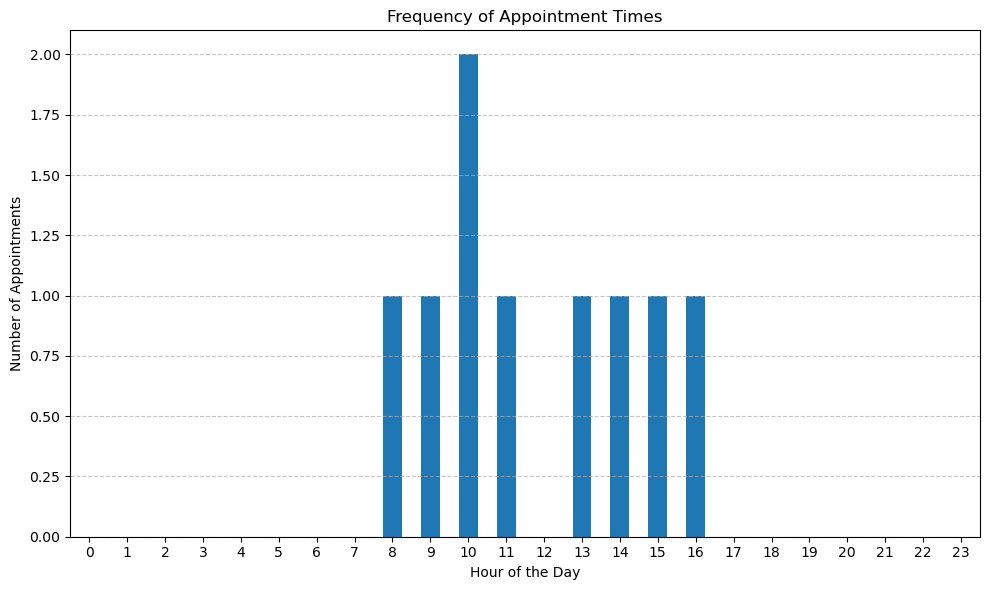


A. Generate a report of all patients whose doctor is in the input
B. Counting the number of appointments by department
C. Create a graph of most frequent appointment times
D. View the prescription for each patient 
E. Find the average age of all patients 
What view insights do you want to do: (A, B, C, D, E, back) E
Average patient age: 40.67

A. Generate a report of all patients whose doctor is in the input
B. Counting the number of appointments by department
C. Create a graph of most frequent appointment times
D. View the prescription for each patient 
E. Find the average age of all patients 
What view insights do you want to do: (A, B, C, D, E, back) A
Enter the doctor's first name: John
Enter the doctor's last name: Doe
A report of all patients whose doctor is in the input:
  FirstName LastName DateOfBirth  Gender  HomeAddress   PhoneNumber
0     Alice   Martin  1980-05-01  Female  123 Main St  555-123-4567

A. Generate a report of all patients whose doctor is in the input
B. Coun

In [21]:
if __name__=="__main__":
    work("hospitaldb")